In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [42]:
data = pd.read_csv('cement_data.csv')
data

,date_time,Cement Type,MDP,MDC,FFS,SDS,SDC,BED,MD,MIP1,...,Feed,PSS,RP3,RP2,RP1,CP,WP,FCT,Blaine,Residue
date_time,,,,,,,,,,,,,,,,,,,,,
7/16/2021 10:26,7/16/2021 10:26,42.5,3298.291862,178.211069,864.566667,851.001191,187.445892,58.763833,51.893810,-4.708457,...,279.060143,61.705166,72.422198,71.253243,53.315950,21.021806,68.209569,233.592009,NaN,NaN
7/16/2021 10:27,7/16/2021 10:27,42.5,3291.276123,179.438870,864.433333,850.986004,186.991837,59.547584,51.856921,-4.653129,...,306.984365,61.704105,72.791336,72.006428,54.056215,20.981683,68.342281,233.516286,NaN,NaN
7/16/2021 10:28,7/16/2021 10:28,42.5,3274.168245,181.262520,864.450000,850.984485,188.002238,57.997499,52.635440,-3.945597,...,283.658207,61.693496,71.848385,71.934312,52.972109,21.040324,68.326076,233.665709,NaN,NaN
7/16/2021 10:29,7/16/2021 10:29,42.5,3228.772392,177.037553,864.466667,850.990560,187.675466,60.853833,52.424708,-4.158661,...,303.102896,61.700392,73.003317,71.926304,53.619336,21.008689,68.382401,233.670993,NaN,NaN
7/16/2021 10:30,7/16/2021 10:30,42.5,3351.213582,185.036202,864.583333,850.952591,187.599559,57.858166,52.527366,-4.365102,...,303.862520,61.704105,74.351956,73.144215,56.527814,20.869032,68.534401,233.791611,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True, drop=False)
by30mins = data.resample('30min', on='date_time').mean()
by30mins

,Cement Type,MDP,MDC,FFS,SDS,SDC,BED,MD,MIP1,FOP,...,Feed,PSS,RP3,RP2,RP1,CP,WP,FCT,Blaine,Residue
date_time,,,,,,,,,,,,,,,,,,,,,
2021-07-16 10:00:00,42.5,3273.127155,178.987503,864.479167,850.990560,187.528858,59.290687,52.202720,-4.366461,-67.871152,...,293.201403,61.700789,72.516309,71.780072,53.490903,21.013126,68.315082,233.611249,NaN,NaN
2021-07-16 10:30:00,42.5,3507.799957,193.703640,864.502222,850.969955,187.898081,60.154844,53.313380,-4.194578,-68.346510,...,304.567006,61.700975,72.826423,71.608468,53.677047,21.012135,68.481934,233.631143,NaN,NaN
2021-07-16 11:00:00,42.5,3318.101181,183.367252,864.495556,850.976233,187.464129,59.594608,52.648417,-4.476093,-68.268760,...,300.371180,61.701647,76.051705,74.622544,58.365673,20.769549,68.477434,233.625162,NaN,NaN
2021-07-16 11:30:00,42.5,3515.477154,193.253288,864.481818,850.972887,188.228193,59.984583,53.070231,-4.228303,-68.348599,...,302.167349,61.702128,74.807484,73.460715,56.185080,20.891478,68.153596,233.634699,NaN,NaN
2021-07-16 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-06 08:00:00,32.5,2982.467770,164.671961,867.142949,830.085380,183.827438,61.529734,54.608658,-4.289459,-68.038632,...,289.619629,60.192140,92.945202,90.650592,75.434913,24.673327,70.179987,230.198320,3914.0,14.6
2021-08-06 08:30:00,32.5,3445.416474,188.501743,879.490000,821.083225,183.857108,65.303791,57.838527,-4.305306,-71.602344,...,320.209908,59.538397,100.954869,95.297246,86.824267,21.293043,69.969552,233.401861,3934.0,16.6
2021-08-06 09:00:00,32.5,3238.479048,177.946894,881.966111,821.085807,183.622474,65.400744,59.078356,-4.068506,-72.303393,...,326.533309,59.536452,105.234724,98.045869,90.542572,21.028853,72.003085,232.110957,3701.0,17.6


In [48]:
by30mins_data = by30mins.dropna()
by30mins_data

,Cement Type,MDP,MDC,FFS,SDS,SDC,BED,MD,MIP1,FOP,...,Feed,PSS,RP3,RP2,RP1,CP,WP,FCT,Blaine,Residue
date_time,,,,,,,,,,,,,,,,,,,,,
2021-07-17 01:00:00,32.5,3379.448385,185.134306,884.500556,865.920661,191.034568,63.684622,56.959591,-3.810432,-71.328321,...,323.697747,62.776615,74.701360,73.877237,57.485579,20.709726,62.341182,252.237037,3810.0,15.3
2021-07-17 01:30:00,32.5,3505.942832,192.545055,884.496667,865.917421,189.949864,65.836741,57.340028,-3.782796,-71.698389,...,333.696425,62.777605,75.708271,75.330591,59.937359,20.544170,62.366644,252.401972,3317.0,17.9
2021-07-17 02:00:00,32.5,3415.357422,187.220392,884.497778,865.920155,190.257382,65.317725,56.789716,-3.909147,-71.461408,...,332.584217,62.777304,77.190922,77.538733,60.665759,20.839069,62.025887,252.390025,3625.0,17.6
2021-07-17 03:30:00,32.5,3560.460656,195.390083,884.510556,873.127776,191.992946,68.341839,58.596666,-3.537462,-71.759923,...,359.106143,63.304850,66.174477,63.275886,47.898112,21.622998,60.564019,251.487817,3667.0,15.4
2021-07-17 05:30:00,32.5,3314.776902,181.307640,884.497222,865.914991,191.032408,62.048616,56.670620,-3.791760,-71.202962,...,313.935933,62.778560,72.109829,71.365686,54.941299,20.988602,62.557380,252.250273,3928.0,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-06 08:00:00,32.5,2982.467770,164.671961,867.142949,830.085380,183.827438,61.529734,54.608658,-4.289459,-68.038632,...,289.619629,60.192140,92.945202,90.650592,75.434913,24.673327,70.179987,230.198320,3914.0,14.6
2021-08-06 08:30:00,32.5,3445.416474,188.501743,879.490000,821.083225,183.857108,65.303791,57.838527,-4.305306,-71.602344,...,320.209908,59.538397,100.954869,95.297246,86.824267,21.293043,69.969552,233.401861,3934.0,16.6
2021-08-06 09:00:00,32.5,3238.479048,177.946894,881.966111,821.085807,183.622474,65.400744,59.078356,-4.068506,-72.303393,...,326.533309,59.536452,105.234724,98.045869,90.542572,21.028853,72.003085,232.110957,3701.0,17.6


<AxesSubplot:xlabel='date_time'>

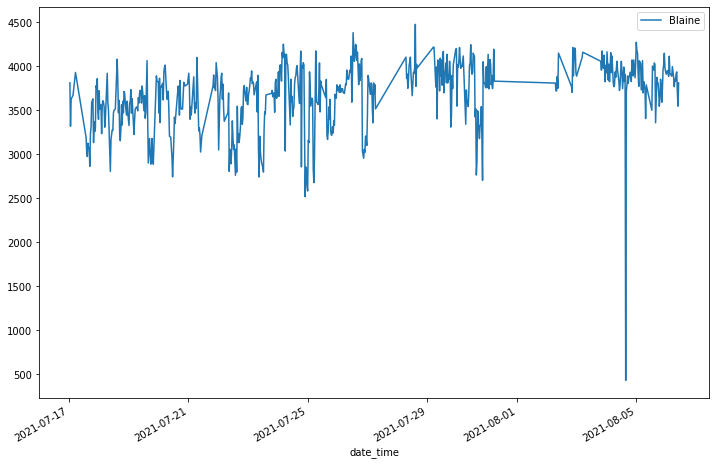

In [55]:
f = (12, 8)
blaine = by30mins_data[['Blaine']]
blaine.plot(figsize = f)

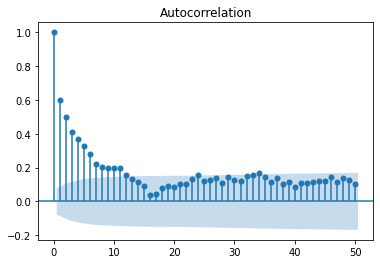

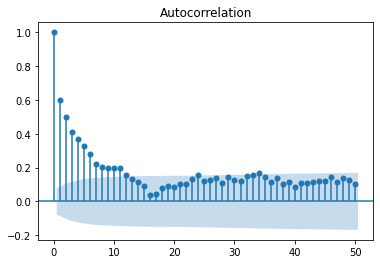

In [57]:
plot_acf(blaine, lags=50)

<AxesSubplot:xlabel='date_time'>

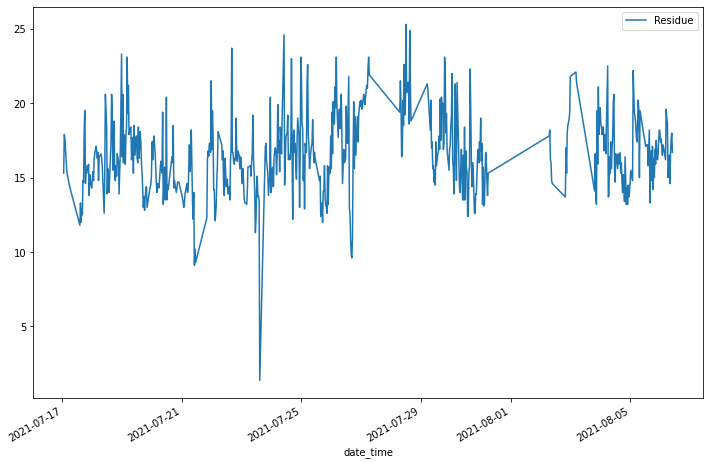

In [54]:
f = (12, 8)
by30mins_data[['Residue']].plot(figsize = f)